In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

movie_rate=pd.read_csv("movie_rate.csv",encoding="latin1")
movie_rate.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movie_rate.shape

(15509, 10)

In [5]:
movie_rate.describe

<bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Vot

In [6]:
movie_rate["Year"].value_counts()

(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: Year, Length: 102, dtype: int64

In [7]:
sum(movie_rate["Year"].value_counts())

14981

In [8]:
movie_rate["Rating"].value_counts()

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64

In [9]:
movie_rate["Rating"].value_counts().sum()

7919

In [10]:
movie_rate["Votes"].value_counts()

8        227
7        224
9        221
6        213
10       175
        ... 
1,754      1
1,208      1
1,148      1
1,277      1
1,496      1
Name: Votes, Length: 2034, dtype: int64

In [11]:
movie_rate["Votes"].value_counts().sum()

7920

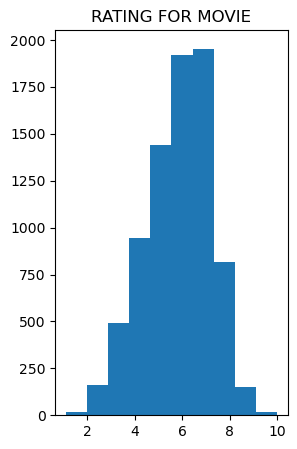

In [12]:
plt.figure(figsize=(3,5))
plt.hist(movie_rate['Rating'])
plt.title("RATING FOR MOVIE")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
convert= LabelEncoder()

movie_rate['Year']= convert.fit_transform(movie_rate['Year'])
movie_rate['Rating']= convert.fit_transform(movie_rate['Rating'])
movie_rate['Votes']= convert.fit_transform(movie_rate['Votes'])

movie_rate.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,67,NaN,Action,32,368,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,78,129 min,"Action, Drama",31,1687,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,84,NaN,Action,84,2034,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,67,NaN,Action,84,2034,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,77,130 min,"Action, Drama",48,794,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


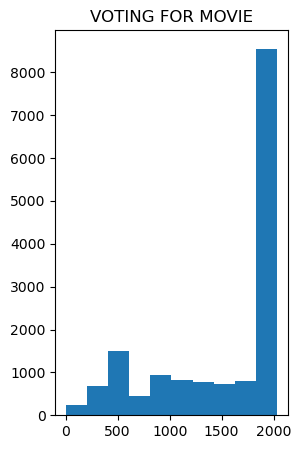

In [15]:
plt.figure(figsize=(3,5))
plt.hist(movie_rate['Votes'])
plt.title("VOTING FOR MOVIE")

plt.show()

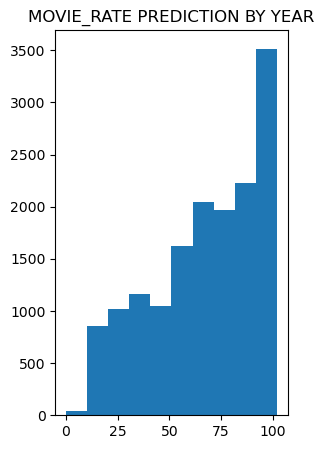

In [16]:
plt.figure(figsize=(3,5))
plt.hist(movie_rate['Year'])
plt.title("MOVIE_RATE PREDICTION BY YEAR")
plt.show()

In [17]:
movie_rate['Year'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
15504    False
15505    False
15506    False
15507    False
15508    False
Name: Year, Length: 15509, dtype: bool

In [18]:
sum(movie_rate['Year'].isnull())

0

In [19]:
sum(movie_rate['Votes'].isnull())

0

In [20]:
sum(movie_rate['Rating'].isnull())

0

In [21]:

X= movie_rate[['Year', 'Votes']]
Y=movie_rate['Rating']


In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [27]:

from sklearn.linear_model import LogisticRegression

movie= LogisticRegression(random_state = 0)
movie.fit(X_train, Y_train)

C:\Users\sekar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [29]:

prediction= print(movie.predict(X_test))

[84 84 40 ... 84 84 84]


In [30]:
print(Y_test)

13720    84
7796     40
4399     69
2702     44
167      24
         ..
13199    84
5095     43
7298     84
13614    84
7968     84
Name: Rating, Length: 3102, dtype: int64


In [31]:
print("ACCURACY:",movie.score(X_test,Y_test)*100)

ACCURACY: 49.45196647324307
